# Setup

In [28]:
import numpy as np
import matplotlib.pylab as plt

In [1]:
with open("input/10", "r") as fp:
    txt = fp.read()[:-1]

In [4]:
my_text = txt


    | is a vertical pipe connecting north and south.
    - is a horizontal pipe connecting east and west.
    L is a 90-degree bend connecting north and east.
    J is a 90-degree bend connecting north and west.
    7 is a 90-degree bend connecting south and west.
    F is a 90-degree bend connecting south and east.
    . is ground; there is no pipe in this tile.
    S is the starting position of the animal; there is a pipe on this tile, but your sketch doesn't show what shape the pipe has.


##### Function

In [5]:
def process_input(xxx):
    lines = xxx.split('\n')
    return lines

In [9]:
def find_S(lines):
    for idx, line in enumerate(lines):
        if "S" in line:
            return idx, line.index("S")
            
    return None
            

##### Does not work

In [25]:
def explore_dist(M, lines, pos):
    i, j = pos
    v0 = M[i, j] + 1
    
    S_valid = "SLJF7-|"
    
    c = lines[i][j]
    lst_explore = []
    if c == "S":
        # Explore all 4 directions
        lst_explore = [(i, j+1), (i, j-1), (i+1, j), (i-1, j)]
        
    elif c == "|":
        lst_explore = [(i-1, j), (i+1, j)]

    elif c == "-":
        lst_explore = [(i, j-1), (i, j+1)]

    elif c == "L":
        lst_explore = [(i-1, j), (i, j+1)]

    elif c == "J":
        lst_explore = [(i-1, j), (i, j-1)]

    elif c == "7":
        lst_explore = [(i+1, j), (i, j-1)]

    elif c == "F":
        lst_explore = [(i+1, j), (i, j+1)]


    lst_new = []
    for i1, j1 in lst_explore:
        if (i1 >= 0) & (i1 < len(M)) & (j1 >= 0) & (j1 < len(M[0])):
            if lines[i1][j1] in S_valid:
                if M[i1, j1] > v0:
                    # Do not add new position if more distant
                    M[i1, j1] = v0
                    lst_new.append((i1, j1))
                
    return lst_new

#### Process input

In [7]:
lines = process_input(my_text)

d0 = len(lines)
d1 = len(lines[0])

##### Find animal location

In [12]:
a, b = find_S(lines)


## Part 1

In [42]:
def explore_dist_v2(M, lines, pos):
    i, j = pos
    v0 = M[i, j] + 1
    
    # (i+di, j+dj)
    dic_next = {
        0: {1: "-J7", -1: "-LF"},
        1: {0: "|LJ"},
        -1: {0: "|F7"},
               }
    c = lines[i][j]
    lst_explore = []
    if c == "S":
        S_valid = "SLJF7-|"
        # Explore all 4 directions
        lst_explore = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        

    elif c == "|":
        lst_explore = [(-1, 0), (1, 0)]

    elif c == "-":
        lst_explore = [(0, -1), (0, 1)]

    elif c == "L":
        lst_explore = [(-1, 0), (0, 1)]

    elif c == "J":
        lst_explore = [(-1, 0), (0, -1)]

    elif c == "7":
        lst_explore = [(1, 0), (0, -1)]

    elif c == "F":
        lst_explore = [(1, 0), (0, +1)]


    lst_new = []
    for di, dj in lst_explore:
        i1, j1 = i+di, j+dj
        s_valid = dic_next[di][dj]
        
        if (i1 >= 0) & (i1 < len(M)) & (j1 >= 0) & (j1 < len(M[0])):
            if lines[i1][j1] in s_valid:
                if M[i1, j1] > v0:
                    # Do not add new position if more distant
                    M[i1, j1] = v0
                    lst_new.append((i1, j1))
                
    return lst_new

In [45]:
M = 999999 * np.ones((d0, d1))
M[a, b] = 0
lst_pos = [(a, b)]

while len(lst_pos) > 0:
    pos = lst_pos.pop(0)
    new_pos = explore_dist_v2(M, lines, pos)
    lst_pos.extend(new_pos)

In [50]:
vmax = max(M[M < M[0, 0]])

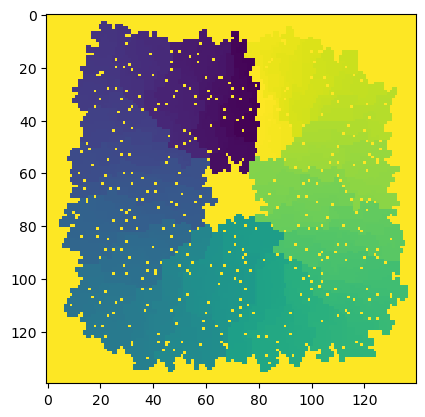

In [51]:
plt.imshow(M, interpolation="none", vmax=vmax)

### Make four different explorations

In [60]:
M_lst = []

M = 999999 * np.ones((d0, d1))
M[a, b] = 0
lst_zeros = explore_dist_v2(M, lines, (a, b))

for pos in lst_zeros: 
    M = 999999 * np.ones((d0, d1))
    M[a, b] = 0
    M[pos[0], pos[1]] = 1
    lst_pos = [pos]

    while len(lst_pos) > 0:
        pos = lst_pos.pop(0)
        new_pos = explore_dist_v2(M, lines, pos)
        lst_pos.extend(new_pos)
        
    M_lst.append(M)

In [67]:
for Mi in M_lst:
    tot = 0
    for ai, bi in lst_zeros:
        tot += Mi[ai, bi]
        
    print("Part 1: {}".format(tot/2))


Part 1: 6786.0
Part 1: 6786.0


In [82]:
a, b

(25, 77)

OK
OK


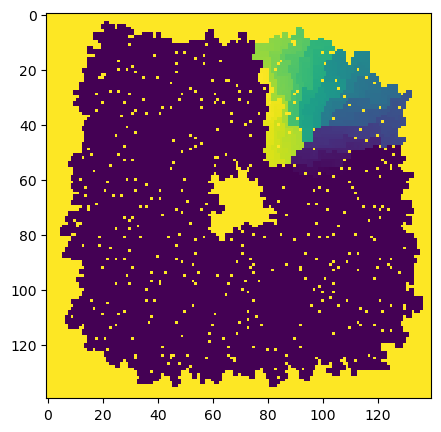

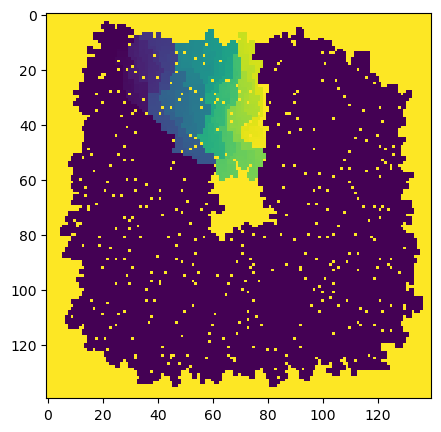

In [91]:
for Mi in M_lst:
    print("OK")
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.imshow(Mi, vmax=vmax, vmin=vmax-2000, interpolation="none")

# Part 2: Enclosed elements

In [76]:
vmax = 6786*2
print(vmax)

13572


In [74]:
M_all = M_lst[0] + M_lst[1]

In [75]:
(M_all == vmax).sum()

13571

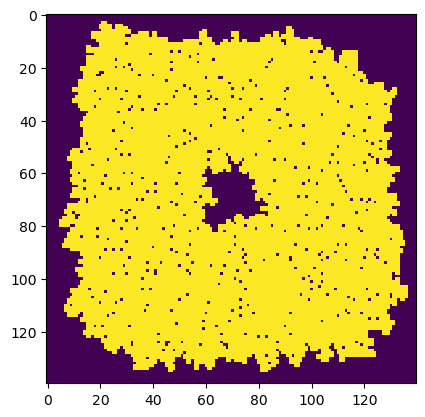

In [73]:
plt.imshow(M_lst[0] + M_lst[1] == vmax, interpolation="none")

## Get snake path

In [115]:
M_ref = M_lst[0]
lst_in = [] # ordered list
pos = (a, b)
cnt = 0

while cnt != vmax-1:
    lst_in.append(pos)
    
    for di, dj in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        i, j = pos[0] + di, pos[1] + dj
        if (i < 0) | (i >= len(M_ref)) | (j < 0) | (j >= len(M_ref[0])):
            continue
        
        if M_ref[i, j] == cnt+1:
            pos = i, j
            cnt += 1
            break


## Explore with a snake

Keep in memory its direction, so "in" and "out" can be identified

In [246]:
#M_cands = ((M_all != vmax) & (M_marked == 0)).astype(int) # True
M_cands = ((M_all != vmax) ).astype(int)

##### Reverse the list if the snakes goes in the other direction

In [235]:
lst_in = lst_in[::-1]

##### Upgrade

In [236]:
i0, j0 = lst_in[0]
lst_val_in = []

ranges = [0, 1]

for i1, j1 in lst_in[1:]:
    
    if i1 - i0 == 1:
        #s_dir == "D"
        for di in ranges:
            if M_cands[i0+di, j0-1] == 1:
                lst_val_in.append((i0+di, j0-1))
            
        
        
    elif i1 - i0 == -1:
        #s_dir == "U"
        for di in ranges:
            if M_cands[i0-di, j0+1] == 1:
                lst_val_in.append((i0-di, j0+1))
        
    elif j1 - j0 == 1:
        #s_dir == "R"
        for di in ranges:
            if M_cands[i0+1, j0+di] == 1:
                lst_val_in.append((i0+1, j0+di))
        
    elif j1 - j0 == -1:
        #s_dir == "L"
        for di in ranges:
            if M_cands[i0-1, j0-di] == 1:
                lst_val_in.append((i0-1, j0-di))
        
    # Update snake location
    i0, j0 = i1, j1


##### Test

In [237]:
M_test = np.zeros(M_cands.shape)

X = np.array(lst_val_in)

M_test[X[:, 0], X[:, 1]] = 1

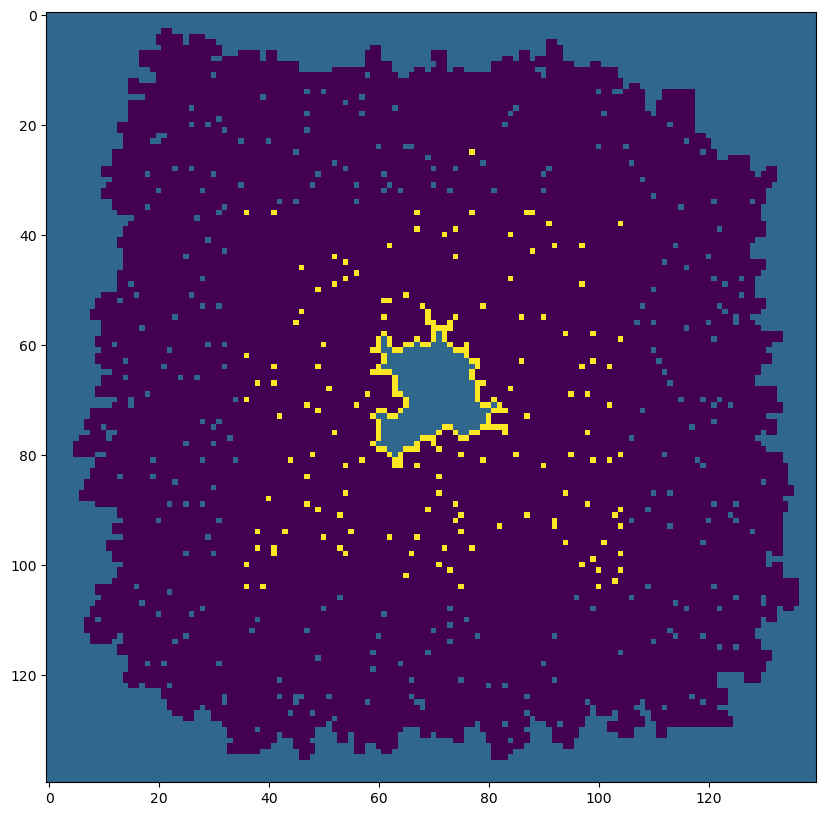

In [238]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(M_cands/2 + M_test, interpolation="none")

##### Propagate

If the snake see one elements, maybe this is an enclosed block

In [240]:
M_test = np.zeros(M_cands.shape)

lst_starts = X.tolist()
while lst_starts != []:
    i, j = lst_starts.pop(0)
    if (M_cands[i, j] == 1) & (M_test[i, j] == 0):
        M_test[i, j] = 1
        lst_starts.extend([(i, j+1), (i, j-1), (i+1, j), (i-1, j)])

In [245]:
M_test.sum() -1 # Because we exceluded the starting point from the list

495.0